## Manipulation Libraries Importation

In [1]:
import pandas as pd
import numpy as np

## Visualization Libraries Importation

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Stop deprecation warnings from being printed
import warnings

## Import Optimizing Drugs Dataset 

In [4]:
Patient_Care_Situation = pd.read_excel("Dataset_McK.xlsx", sheetname = "Patient_Care_Situation")
Patient_Demographics = pd.read_excel("Dataset_McK.xlsx", sheetname = "Patient_Demographics")
Patient_Previous_Conditions = pd.read_excel("Dataset_McK.xlsx", sheetname = "Patient_Previous_Conditions")

C:\Users\teodo\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


## Data Exploration

We decided to transform this table to a boolean table in order to have just one row per Patient

In [5]:
Patient_Previous_Conditions['Previous_Condition'].value_counts()

A    10597
E     4732
C     2191
B     1625
D      986
F      644
Name: Previous_Condition, dtype: int64

In [6]:
Patient_Previous_Conditions_transf = pd.get_dummies(Patient_Previous_Conditions.Previous_Condition)
Patient_Previous_Conditions_transf["Patient_ID"] = Patient_Previous_Conditions["Patient_ID"]
Patient_Previous_Conditions_transf_ = Patient_Previous_Conditions_transf.groupby("Patient_ID").sum().reset_index()
Patient_Previous_Conditions_transf_

,Patient_ID,A,B,C,D,E,F
0,1,1,0,0,0,0,0
1,2,1,0,0,0,0,0
2,3,1,0,0,0,0,0
3,4,1,0,0,0,1,0
4,5,1,0,0,0,0,0
5,6,1,0,0,0,0,0
6,7,1,0,0,0,1,0
7,8,0,0,1,0,0,0
8,9,1,0,0,0,0,0
9,10,1,0,0,0,0,0


In [7]:
Patient_Previous_Conditions.shape

(20775, 2)

In [8]:
Patient_Care_Situation.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'ID_Patient',
       'Treated_with_drugs', 'Survived_1_year', 'Train/ Test/ Score'],
      dtype='object')

In [9]:
Patient_Care_Situation.shape

(33019, 6)

In [10]:
Patient_Care_Situation.drop_duplicates("ID_Patient").shape

(11638, 6)

In [11]:
Patient_Demographics.columns

Index(['Patient_ID', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban'],
      dtype='object')

In [12]:
Patient_Demographics.shape

(12500, 5)

In [13]:
Patient_Demographics.drop_duplicates('Patient_ID').shape

(12500, 5)

No duplicates, therefore we are good

## Join Patient Care Situation x Patient Demographics 

In [14]:
Patient_Care_Situation_Demographics = pd.merge(Patient_Care_Situation, Patient_Demographics, left_on = "ID_Patient", right_on='Patient_ID', how = "left").drop('ID_Patient', axis = 1)

In [15]:
Patient_Care_Situation_Demographics.shape

(33019, 10)

In [16]:
all_patient_info = pd.merge(Patient_Care_Situation_Demographics, Patient_Previous_Conditions_transf_, on = 'Patient_ID', how = "left")

In [17]:
all_patient_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33019 entries, 0 to 33018
Data columns (total 16 columns):
ID_Patient_Care_Situation    33019 non-null int64
Diagnosed_Condition          33019 non-null int64
Treated_with_drugs           33019 non-null object
Survived_1_year              33019 non-null object
Train/ Test/ Score           33019 non-null object
Patient_ID                   33019 non-null int64
Patient_Age                  33019 non-null int64
Patient_Body_Mass_Index      33019 non-null float64
Patient_Smoker               33019 non-null object
Patient_Rural_Urban          33019 non-null object
A                            31187 non-null float64
B                            31187 non-null float64
C                            31187 non-null float64
D                            31187 non-null float64
E                            31187 non-null float64
F                            31187 non-null float64
dtypes: float64(7), int64(4), object(5)
memory usage: 4.3+ MB


### Droping Score Samples

In [18]:
all_patient_info["Train/ Test/ Score"].value_counts()

Train    29811
Test      3188
Score       20
Name: Train/ Test/ Score, dtype: int64

In [19]:
number_score_records = all_patient_info["Train/ Test/ Score"].value_counts()["Score"]
number_score_records

20

In [20]:
all_patient_info_noScore = all_patient_info.loc[all_patient_info["Train/ Test/ Score"]!= "Score", :]

In [21]:
all_patient_info_train = all_patient_info.loc[all_patient_info["Train/ Test/ Score"]== "Train"]

In [22]:
all_patient_info_test = all_patient_info.loc[all_patient_info["Train/ Test/ Score"]== "Test"]

In [23]:
all_patient_info_test.Survived_1_year.value_counts()

1    2012
0    1176
Name: Survived_1_year, dtype: int64

In [24]:
all_patient_info_test_surv = all_patient_info_test.loc[all_patient_info_test.Survived_1_year == 1,:]

In [25]:
all_patient_info_Score_surv = all_patient_info_test_surv.iloc[:int(number_score_records/2)]

In [26]:
all_patient_info_new_test_surv = all_patient_info_test_surv.iloc[int(number_score_records/2):]

In [27]:
all_patient_info_Score_surv

,ID_Patient_Care_Situation,Diagnosed_Condition,Treated_with_drugs,Survived_1_year,Train/ Test/ Score,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F
29811,29812,26,DX3,1,Test,7057,26,24.875801,NO,RURAL,1.0,1.0,0.0,1.0,0.0,0.0
29812,29813,44,DX6,1,Test,9153,22,23.836874,YES,RURAL,0.0,0.0,0.0,0.0,1.0,0.0
29813,29814,14,DX6,1,Test,4544,1,22.718246,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0
29814,29815,22,DX6,1,Test,5258,58,20.528353,NO,RURAL,1.0,0.0,0.0,0.0,1.0,1.0
29815,29816,11,DX5,1,Test,4797,8,21.805588,NO,RURAL,1.0,0.0,0.0,0.0,1.0,0.0
29816,29817,37,DX2,1,Test,11558,55,27.555183,NO,RURAL,1.0,0.0,1.0,0.0,1.0,0.0
29817,29818,2,DX6,1,Test,9118,36,19.100945,NO,RURAL,1.0,0.0,0.0,0.0,1.0,0.0
29820,29821,42,DX6,1,Test,6242,11,19.269733,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0
29821,29822,32,DX1,1,Test,6934,2,29.710098,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0
29825,29826,4,DX4,1,Test,10790,31,24.860231,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0


In [28]:
all_patient_info_test_noSurv = all_patient_info_test.loc[all_patient_info_test.Survived_1_year == 0,:]
all_patient_info_Score_noSurv = all_patient_info_test_noSurv.iloc[:int(number_score_records/2)]
all_patient_info_new_test_noSurv = all_patient_info_test_noSurv.iloc[int(number_score_records/2):]

In [29]:
all_patient_info_Score = pd.concat([all_patient_info_Score_noSurv, all_patient_info_Score_surv])
all_patient_info_Score.shape

(20, 16)

In [30]:
all_patient_info_Score

,ID_Patient_Care_Situation,Diagnosed_Condition,Treated_with_drugs,Survived_1_year,Train/ Test/ Score,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F
29818,29819,3,DX6,0,Test,4332,23,17.113935,YES,URBAN,1.0,0.0,0.0,0.0,1.0,0.0
29819,29820,25,DX1 DX2,0,Test,7452,9,18.990843,NO,URBAN,1.0,1.0,0.0,0.0,1.0,0.0
29822,29823,11,DX1,0,Test,10027,46,18.272649,YES,RURAL,1.0,0.0,0.0,0.0,1.0,1.0
29823,29824,24,DX6,0,Test,7780,54,22.197462,NO,RURAL,1.0,0.0,0.0,0.0,1.0,0.0
29824,29825,34,DX2,0,Test,2352,19,22.909632,YES,RURAL,1.0,1.0,0.0,0.0,0.0,0.0
29828,29829,4,DX6,0,Test,7926,15,28.543306,YES,URBAN,1.0,0.0,0.0,1.0,1.0,0.0
29833,29834,11,DX1,0,Test,377,56,17.953928,YES,URBAN,1.0,0.0,1.0,0.0,0.0,1.0
29835,29836,48,DX1 DX3,0,Test,12234,64,18.244488,YES,URBAN,1.0,0.0,0.0,0.0,0.0,0.0
29836,29837,47,DX6,0,Test,6208,10,17.491833,NO,URBAN,1.0,0.0,0.0,0.0,1.0,0.0
29837,29838,25,DX2,0,Test,4335,51,28.968066,NO,URBAN,1.0,0.0,0.0,0.0,1.0,0.0


In [31]:
all_patient_info_new_test = pd.concat([all_patient_info_new_test_surv, all_patient_info_new_test_noSurv])
all_patient_info_new_test.Survived_1_year.value_counts()

1    2002
0    1166
Name: Survived_1_year, dtype: int64

In [32]:
all_patient_info_train_test = pd.concat([all_patient_info_new_test, all_patient_info_train]) 

In [33]:
all_patient_info_train_test.shape

(32979, 16)

In [34]:
all_patient_info_train_test["Train/ Test/ Score"].value_counts()

Train    29811
Test      3168
Name: Train/ Test/ Score, dtype: int64

In [35]:
all_patient_info_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32979 entries, 29826 to 29810
Data columns (total 16 columns):
ID_Patient_Care_Situation    32979 non-null int64
Diagnosed_Condition          32979 non-null int64
Treated_with_drugs           32979 non-null object
Survived_1_year              32979 non-null object
Train/ Test/ Score           32979 non-null object
Patient_ID                   32979 non-null int64
Patient_Age                  32979 non-null int64
Patient_Body_Mass_Index      32979 non-null float64
Patient_Smoker               32979 non-null object
Patient_Rural_Urban          32979 non-null object
A                            31148 non-null float64
B                            31148 non-null float64
C                            31148 non-null float64
D                            31148 non-null float64
E                            31148 non-null float64
F                            31148 non-null float64
dtypes: float64(7), int64(4), object(5)
memory usage: 4.3+ MB


In [36]:
100-31148*100/32979  #Percentage of NaN Rows 

5.552017950817188

## Handling Categorical Data

In [37]:
all_patient_info_train_test.Treated_with_drugs.value_counts().index

Index(['DX6', 'DX5 ', 'DX2 ', 'DX1 ', 'DX4 ', 'DX3 ', 'DX1 DX2 ', 'DX3 DX4 ',
       'DX2 DX4 ', 'DX2 DX3 ', 'DX4 DX5 ', 'DX1 DX3 ', 'DX1 DX5 ', 'DX3 DX5 ',
       'DX2 DX5 ', 'DX1 DX4 ', 'DX1 DX2 DX5 ', 'DX3 DX4 DX5 ', 'DX1 DX2 DX4 ',
       'DX1 DX2 DX3 ', 'DX1 DX3 DX4 ', 'DX2 DX3 DX4 ', 'DX2 DX3 DX5 ',
       'DX1 DX3 DX5 ', 'DX2 DX4 DX5 ', 'DX1 DX4 DX5 ', 'DX1 DX3 DX4 DX5 ',
       'DX1 DX2 DX3 DX4 ', 'DX2 DX3 DX4 DX5 ', 'DX1 DX2 DX4 DX5 ',
       'DX1 DX2 DX3 DX5 ', 'DX1 DX2 DX3 DX4 DX5 '],
      dtype='object')

In [38]:
Treated_with_drugs_df = pd.DataFrame(all_patient_info_train_test.Treated_with_drugs.str.split(' ').tolist(), index=all_patient_info_train_test.ID_Patient_Care_Situation).stack()

Treated_with_drugs_df_ = Treated_with_drugs_df.reset_index([0, 'ID_Patient_Care_Situation']).set_index('ID_Patient_Care_Situation')


In [39]:
Treated_with_drugs_df_

,0
ID_Patient_Care_Situation,
29827,DX6
29828,DX6
29830,DX1
29830,
29831,DX4
29831,
29832,DX5
29832,
29833,DX1


In [40]:
Treated_with_drugs_df_bool = pd.get_dummies(Treated_with_drugs_df_[0]).reset_index().drop([''], axis=1)
Treated_with_drugs_df_bool_ = Treated_with_drugs_df_bool.groupby("ID_Patient_Care_Situation").sum().reset_index()
Treated_with_drugs_df_bool_.shape

(32979, 7)

In [41]:
Treated_with_drugs_df_bool_

,ID_Patient_Care_Situation,DX1,DX2,DX3,DX4,DX5,DX6
0,1,0,0,0,0,0,1
1,2,0,1,1,0,0,0
2,3,0,1,0,0,0,0
3,4,0,0,0,0,0,1
4,5,0,1,0,0,0,0
5,6,1,0,0,0,0,0
6,7,0,0,0,0,0,1
7,8,0,1,0,0,0,0
8,9,0,1,0,0,1,0
9,10,0,1,0,0,0,0


## Patient_Age

In [42]:
all_patient_info_train_test.Patient_Age.describe()

count    32979.000000
mean        33.195064
std         19.441143
min          0.000000
25%         16.000000
50%         33.000000
75%         50.000000
max         66.000000
Name: Patient_Age, dtype: float64

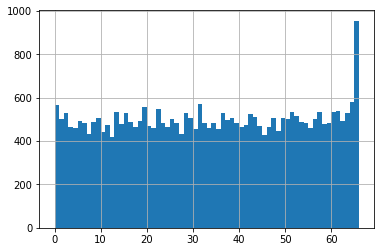

In [43]:
all_patient_info_train_test.Patient_Age.hist(bins=66)

In [44]:
all_patient_info_train_test.Patient_Body_Mass_Index.describe()

count    32979.000000
mean        23.458680
std          3.770114
min         17.000336
25%         20.203022
50%         23.392495
75%         26.774765
max         29.999579
Name: Patient_Body_Mass_Index, dtype: float64

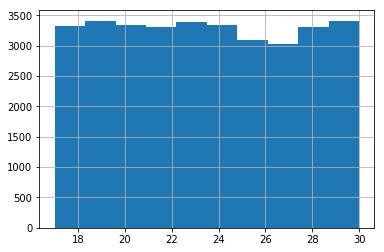

In [45]:
all_patient_info_train_test.Patient_Body_Mass_Index.hist()

In [46]:
all_patient_info_train_test.Patient_Smoker.value_counts()

NO     18906
YES    14073
Name: Patient_Smoker, dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
label_encoder = LabelEncoder() 

all_patient_info_train_test["Patient_Smoker_bool"] = label_encoder.fit_transform(all_patient_info_train_test.Patient_Smoker)

In [49]:
all_patient_info_train_test.Patient_Rural_Urban.value_counts()

RURAL    23047
URBAN     9932
Name: Patient_Rural_Urban, dtype: int64

In [50]:
all_patient_info_train_test["Patient_Rural_Urban_bool"] = label_encoder.fit_transform(all_patient_info_train_test.Patient_Rural_Urban)


In [51]:
all_patient_info_clean = pd.merge(all_patient_info_train_test, Treated_with_drugs_df_bool_, on = "ID_Patient_Care_Situation")

In [52]:
columns_to_drop = ["Treated_with_drugs", "Patient_Smoker", "Patient_Rural_Urban"]
all_patient_info_clean_ = all_patient_info_clean.drop(columns_to_drop, axis = 1)

In [53]:
all_patient_info_clean_.dropna(inplace=True)

In [54]:
all_patient_info_clean_['Weight Class'] = 0

In [55]:
all_patient_info_clean_.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Survived_1_year,Train/ Test/ Score,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,...,F,Patient_Smoker_bool,Patient_Rural_Urban_bool,DX1,DX2,DX3,DX4,DX5,DX6,Weight Class
0,29827,15,1,Test,7163,17,23.311504,1.0,1.0,0.0,...,0.0,0,1,0,0,0,0,0,1,0
1,29828,9,1,Test,9936,34,24.184989,1.0,0.0,0.0,...,0.0,1,0,0,0,0,0,0,1,0
2,29830,6,1,Test,7802,16,18.064512,0.0,0.0,1.0,...,0.0,1,0,1,0,0,0,0,0,0
3,29831,40,1,Test,4763,37,26.610680,1.0,0.0,0.0,...,0.0,1,1,0,0,0,1,0,0,0
4,29832,14,1,Test,9414,17,17.829386,1.0,0.0,0.0,...,0.0,0,0,0,0,0,0,1,0,0


In [56]:
all_patient_info_clean_.loc[all_patient_info_clean_['Patient_Body_Mass_Index'] < 18.5, 'Weight Class'] = 'Underweight'
all_patient_info_clean_.loc[(all_patient_info_clean_['Patient_Body_Mass_Index'] >= 18.5) & (all_patient_info_clean_['Patient_Body_Mass_Index'] < 25), 'Weight Class'] = 'Normal'
all_patient_info_clean_.loc[(all_patient_info_clean_['Patient_Body_Mass_Index'] >= 25) & (all_patient_info_clean_['Patient_Body_Mass_Index'] < 30), 'Weight Class'] = 'Overweight'
all_patient_info_clean_.loc[all_patient_info_clean_['Patient_Body_Mass_Index'] >= 30, 'Weight Class'] = 'Obesity'

In [57]:
all_patient_info_clean_.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Survived_1_year,Train/ Test/ Score,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,...,F,Patient_Smoker_bool,Patient_Rural_Urban_bool,DX1,DX2,DX3,DX4,DX5,DX6,Weight Class
0,29827,15,1,Test,7163,17,23.311504,1.0,1.0,0.0,...,0.0,0,1,0,0,0,0,0,1,Normal
1,29828,9,1,Test,9936,34,24.184989,1.0,0.0,0.0,...,0.0,1,0,0,0,0,0,0,1,Normal
2,29830,6,1,Test,7802,16,18.064512,0.0,0.0,1.0,...,0.0,1,0,1,0,0,0,0,0,Underweight
3,29831,40,1,Test,4763,37,26.610680,1.0,0.0,0.0,...,0.0,1,1,0,0,0,1,0,0,Overweight
4,29832,14,1,Test,9414,17,17.829386,1.0,0.0,0.0,...,0.0,0,0,0,0,0,0,1,0,Underweight


In [58]:
all_patient_info_clean_ = pd.concat([all_patient_info_clean_, pd.get_dummies(all_patient_info_clean_['Weight Class'])], axis=1)

In [59]:
all_patient_info_clean_.drop(['Patient_Body_Mass_Index','Weight Class'], axis=1, inplace=True)

In [60]:
all_patient_info_clean_.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Survived_1_year,Train/ Test/ Score,Patient_ID,Patient_Age,A,B,C,D,...,Patient_Rural_Urban_bool,DX1,DX2,DX3,DX4,DX5,DX6,Normal,Overweight,Underweight
0,29827,15,1,Test,7163,17,1.0,1.0,0.0,0.0,...,1,0,0,0,0,0,1,1,0,0
1,29828,9,1,Test,9936,34,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,1,0,0
2,29830,6,1,Test,7802,16,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
3,29831,40,1,Test,4763,37,1.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,1,0
4,29832,14,1,Test,9414,17,1.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1


In [61]:
all_patient_info_clean_.drop(['ID_Patient_Care_Situation','Patient_ID'], axis=1, inplace=True)

In [62]:
all_patient_info_clean_.head()

,Diagnosed_Condition,Survived_1_year,Train/ Test/ Score,Patient_Age,A,B,C,D,E,F,...,Patient_Rural_Urban_bool,DX1,DX2,DX3,DX4,DX5,DX6,Normal,Overweight,Underweight
0,15,1,Test,17,1.0,1.0,0.0,0.0,1.0,0.0,...,1,0,0,0,0,0,1,1,0,0
1,9,1,Test,34,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,1,0,0
2,6,1,Test,16,0.0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
3,40,1,Test,37,1.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,0,1,0,0,0,1,0
4,14,1,Test,17,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1


In [63]:
all_patient_info_clean_ = pd.concat([all_patient_info_clean_, pd.get_dummies(all_patient_info_clean_['Diagnosed_Condition'],prefix='Diagnosed_Condition_')], axis=1)
all_patient_info_clean_.drop(['Diagnosed_Condition'], axis=1, inplace=True)

In [64]:
all_patient_info_clean_.head()

,Survived_1_year,Train/ Test/ Score,Patient_Age,A,B,C,D,E,F,Patient_Smoker_bool,...,Diagnosed_Condition__43,Diagnosed_Condition__44,Diagnosed_Condition__45,Diagnosed_Condition__46,Diagnosed_Condition__47,Diagnosed_Condition__48,Diagnosed_Condition__49,Diagnosed_Condition__50,Diagnosed_Condition__51,Diagnosed_Condition__52
0,1,Test,17,1.0,1.0,0.0,0.0,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Test,34,1.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,Test,16,0.0,0.0,1.0,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,Test,37,1.0,0.0,0.0,0.0,1.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,Test,17,1.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


## ML Model

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,roc_auc_score, accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, make_scorer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, train_test_split,KFold
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
from sklearn import preprocessing
from functools import partial
from sklearn import tree
import pydotplus
import io
from scipy import misc
import time

## Learning Curve

In [66]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    plt.rcParams['font.size'] = 20
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o', linestyle = '--')
    plt.fill_between(train_sizes, train_mean - train_std,
                     train_mean + train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='test score', color='red', marker='o')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('Accuracy')
    plt.grid(ls='--')
    plt.ylim(0.7, 0.9)
    plt.legend(loc='best')
    plt.show()

In [67]:
y = all_patient_info_clean_['Survived_1_year']

In [68]:
y=y.astype('int')

In [69]:
X = all_patient_info_clean_.drop(['Survived_1_year','Train/ Test/ Score'],axis=1)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [71]:
X['Age_Class'] = 0

In [72]:
X.loc[X['Patient_Age'] < 6, 'Age_Class'] = 'Children'
X.loc[(X['Patient_Age'] >= 6) & (X['Patient_Age'] < 18), 'Age_Class'] = 'Teenagers'
X.loc[(X['Patient_Age'] >= 18) & (X['Patient_Age'] < 40), 'Age_Class'] = 'Adults'
X.loc[(X['Patient_Age'] >= 40) & (X['Patient_Age'] < 66), 'Age_Class'] = 'Experienced People'
X.loc[X['Patient_Age'] >= 66, 'Age_Class'] = 'Senile'

In [73]:
X = pd.concat([X, pd.get_dummies(X['Age_Class'])], axis=1)

In [74]:
X.drop(['Age_Class','Patient_Age'], axis=1, inplace=True)

In [75]:
X.head()

,A,B,C,D,E,F,Patient_Smoker_bool,Patient_Rural_Urban_bool,DX1,DX2,...,Diagnosed_Condition__48,Diagnosed_Condition__49,Diagnosed_Condition__50,Diagnosed_Condition__51,Diagnosed_Condition__52,Adults,Children,Experienced People,Senile,Teenagers
0,1.0,1.0,0.0,0.0,1.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,0.0,0.0,0.0,1.0,0.0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Logistic Regression

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
LR = LogisticRegression(solver='liblinear')

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']

scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=5)
print('Accuracy:', scores['test_accuracy'].mean().round(3))
print('Precision:',scores['test_precision_macro'].mean().round(3))
print('Recall:',scores['test_recall_macro'].mean().round(3))
print('F1:',scores['test_f1_weighted'].mean().round(3))
print('ROC_AUC:',scores['test_roc_auc'].mean().round(3))

Accuracy: 0.777
Precision: 0.765
Recall: 0.75
F1: 0.774
ROC_AUC: 0.857


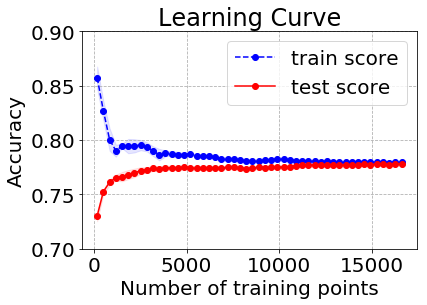

In [77]:
# Setting the learning curve
train_learning_sizes, train_learning_scores, test_learning_scores = learning_curve(estimator=LR,
                                                        X=X_train,
                                                        y=y_train,
                                                        train_sizes = np.linspace(0.01, 1.0, 50),
                                                        cv=KFold(n_splits=3, random_state=42, shuffle=True))
# Plotting the learing curve
plot_learning_curve(train_sizes = train_learning_sizes,
                    train_scores = train_learning_scores,
                    test_scores = test_learning_scores,
                    title='Learning Curve')

## Random Forest

new best: 0.8047944069330855 
 {'max_depth': 13, 'max_leaf_nodes': 20, 'min_samples_leaf': 57, 'min_samples_split': 149, 'n_estimators': 242} 
 Counter: 1 
 Duration: 17.256391286849976
new best: 0.8085842103822903 
 {'max_depth': 13, 'max_leaf_nodes': 47, 'min_samples_leaf': 31, 'min_samples_split': 93, 'n_estimators': 60} 
 Counter: 3 
 Duration: 38.737406969070435
new best: 0.8105262037944856 
 {'max_depth': 15, 'max_leaf_nodes': 47, 'min_samples_leaf': 21, 'min_samples_split': 109, 'n_estimators': 60} 
 Counter: 8 
 Duration: 73.62964701652527
new best: 0.8119630460891495 
 {'max_depth': 15, 'max_leaf_nodes': 55, 'min_samples_leaf': 21, 'min_samples_split': 109, 'n_estimators': 18} 
 Counter: 9 
 Duration: 75.44999742507935
new best: 0.8133839936829224 
 {'max_depth': 21, 'max_leaf_nodes': 58, 'min_samples_leaf': 10, 'min_samples_split': 109, 'n_estimators': 36} 
 Counter: 40 
 Duration: 346.3253221511841
Elapse:  423.1610515117645


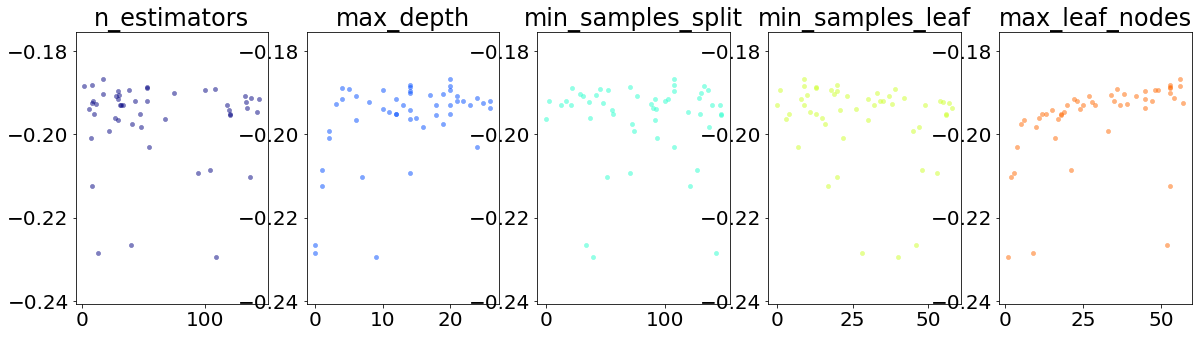

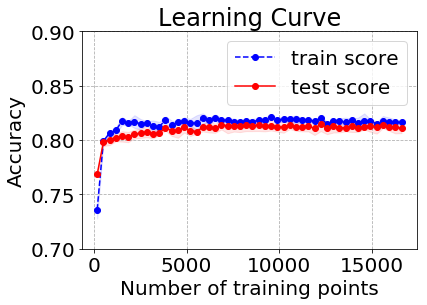

Confusion Matrix:
 [[1367  983]
 [ 552 3328]]


In [78]:
# Implementation of random forest tuning the hyperparameters with Bayesian Optimization

if __name__ == '__main__':
    
    scorer = make_scorer(f1_score)  
    n_iter_search = 50
    algo = partial(tpe.suggest, n_startup_jobs=-1)
    
    start = time.time()
    # Encoding the labels since the method doesn't understand strings
    y_process_labels = preprocessing.LabelEncoder().fit_transform(y)

    # Spliting the data into Training and Test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_process_labels, test_size=0.2, random_state=42)

    # Creation of a custom metric function 
    def scorer_model(params):
        clf = RandomForestClassifier(**params)
        score = cross_val_score(clf,
                               X_train,
                               y_train,
                               scoring=scorer,
                               cv=KFold(n_splits=10,shuffle=True)
                              ).mean()
        return score
        
        # Hyperparameters and ranges to plot
    param_space = {
        'n_estimators': hp.choice('n_estimators', np.arange(2, 300, 2)),
        'max_depth': hp.choice('max_depth', np.arange(1, 28, 1)),
        'min_samples_split': hp.choice('min_samples_split',  np.arange(2,150,1)),
        'min_samples_leaf': hp.choice('min_samples_leaf', np.arange(1,60,1)),
        'max_leaf_nodes': hp.choice('max_leaf_nodes', np.arange(2,60,1))}
        
    # Evaluation progress of our perfomance and decision making
    best = 0
    count = 0
    start = time.time()
    def performance(params):
            global best
            global count
            global start
            model = scorer_model(params)
            count = count + 1
            if model > best:
                best = model
                stop = time.time()
                print ('new best:', best,'\n', params,'\n', 'Counter:', count,'\n', 'Duration:', stop-start)
            return {'loss': 1-model, 'status': STATUS_OK}
        
    # Building the Bayesian Algorithm for Random Forest Hyperparameter Tuning
    trials = Trials()
    bay_opt = fmin(performance,
                   param_space,
                   algo=algo,
                   max_evals=n_iter_search,
                   trials=trials
                  )

    # Get the values of the optimal parameters
    best_params = space_eval(param_space, bay_opt)

    # Fit the model with the optimal hyperparamters
    clf = RandomForestClassifier()
    clf.set_params(**best_params)
    clf.fit(X_train, y_train)

    #Create DOT data
    dot_data = io.StringIO()
    tree.export_graphviz(clf.set_params(**best_params).estimators_[0],
                         out_file=dot_data,
                         feature_names = list(X.columns),
                         class_names = ['0', '1', '2'],
                         rounded = True,
                         proportion = False, 
                         precision = 2,
                         filled = True
                        )
    end = time.time()
    elapse = end - start
    print("Elapse: ", elapse)

    # Setting the Evaluation curves for each Hyperparameter
    parameters = ['n_estimators',
                  'max_depth',
                  'min_samples_split',
                  'min_samples_leaf',
                  'max_leaf_nodes']
    cols = len(parameters)
    f, axes = plt.subplots(nrows=1, ncols=cols, figsize=(20,5))
    cmap = plt.cm.jet
    for i, val in enumerate(parameters):
        xs = np.array([t['misc']['vals'][val] for t in trials.trials]).ravel()
        ys = [-t['result']['loss'] for t in trials.trials]
        xs, ys = zip(*sorted(zip(xs, ys)))
        ys = np.array(ys)
        axes[i].scatter(xs, ys, s=20, linewidth=0.3, alpha=0.5, c=cmap(float(i)/len(parameters)))
        axes[i].set_title(val)
    plt.show()    


    # Setting the learning curve
    train_learning_sizes, train_learning_scores, test_learning_scores = learning_curve(estimator=clf.set_params(**best_params),
                                                            X=X_train,
                                                            y=y_train,
                                                            train_sizes = np.linspace(0.01, 1.0, 50),
                                                            scoring=scorer,
                                                            cv=KFold(n_splits=3, random_state=42, shuffle=True))

    # Plotting the learing curve
    plot_learning_curve(train_sizes = train_learning_sizes,
                                train_scores = train_learning_scores,
                                test_scores = test_learning_scores,
                                title='Learning Curve')

    y_pred = clf.set_params(**best_params).predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)

### Features Importancy

Feature ranking:
1. feature DX6 (0.267597)
2. feature Patient_Smoker_bool (0.165030)
3. feature Normal (0.102561)
4. feature DX5 (0.084613)
5. feature D (0.038288)
6. feature Overweight (0.037780)
7. feature Patient_Rural_Urban_bool (0.035355)
8. feature DX1 (0.032193)
9. feature DX3 (0.029961)
10. feature DX4 (0.024331)
11. feature DX2 (0.023595)
12. feature A (0.019119)
13. feature Underweight (0.017424)
14. feature Children (0.016634)
15. feature Diagnosed_Condition__31 (0.006864)
16. feature Diagnosed_Condition__25 (0.006565)
17. feature Diagnosed_Condition__27 (0.006111)
18. feature Diagnosed_Condition__20 (0.005797)
19. feature Diagnosed_Condition__26 (0.005741)
20. feature Diagnosed_Condition__21 (0.004775)
21. feature Diagnosed_Condition__22 (0.004695)
22. feature Adults (0.004611)
23. feature Diagnosed_Condition__24 (0.004380)
24. feature Diagnosed_Condition__30 (0.004140)
25. feature B (0.004136)
26. feature Diagnosed_Condition__29 (0.004107)
27. feature Teenagers (0.003921)


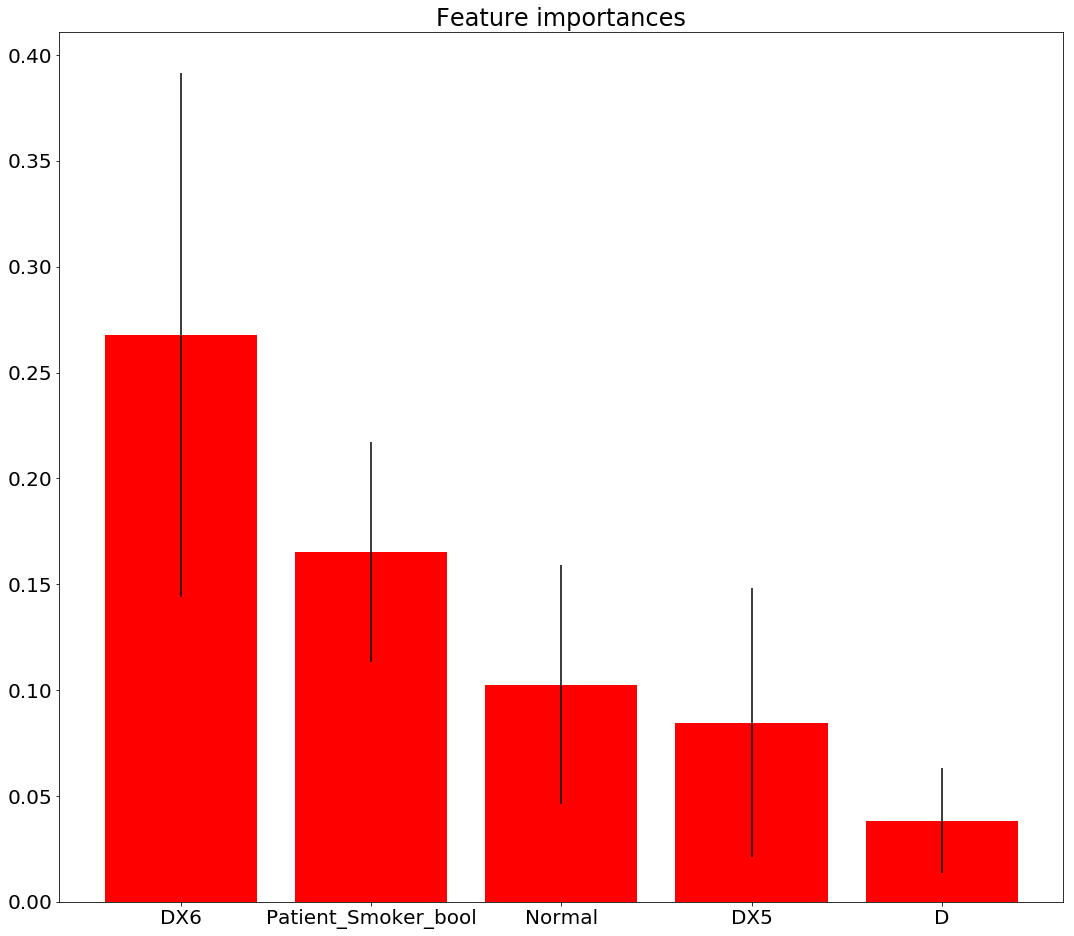

In [84]:
rf = RandomForestClassifier(max_depth= 21, max_leaf_nodes= 58, min_samples_leaf= 10, min_samples_split= 109, n_estimators= 36)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(18,16))
plt.title("Feature importances")
plt.bar(range(0,5), importances[indices[0:5]],
       color="r", yerr=std[indices[0:5]], align="center")
plt.xticks(range(0,5), X_train.columns[indices[0:5]])
plt.show()

## SVM

In [82]:
clf = SVC(gamma='auto')
clf.fit(X_train, y_train.astype(int))
out = clf.predict(X_test)
print(classification_report(y_test.astype(int),out))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69      2350
           1       0.80      0.87      0.83      3880

   micro avg       0.78      0.78      0.78      6230
   macro avg       0.78      0.76      0.76      6230
weighted avg       0.78      0.78      0.78      6230

